rays aperture 0.0
rays aperture 0.0
rays aperture 0.22779274
rays aperture 0.22694016


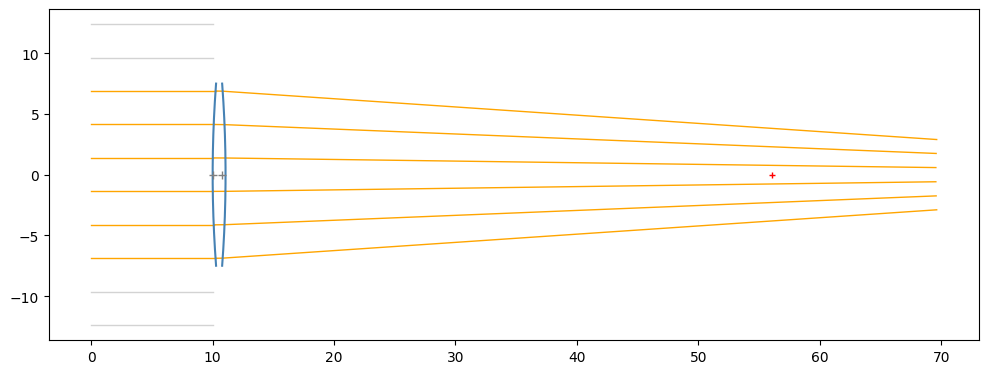

[  0/100] L=  6.772 | grad norm= 2213.190673828125
[  5/100] L=  0.281 | grad norm= 461.4908447265625
[ 10/100] L=  0.712 | grad norm= 749.4451293945312
[ 15/100] L=  0.680 | grad norm= 732.2124633789062


[ 20/100] L=  0.011 | grad norm= 83.65656280517578
[ 25/100] L=  0.187 | grad norm= 376.21246337890625
[ 30/100] L=  0.132 | grad norm= 315.4606018066406
[ 35/100] L=  0.002 | grad norm= 21.975072860717773


[ 40/100] L=  0.058 | grad norm= 209.9605255126953
[ 45/100] L=  0.015 | grad norm= 103.57444763183594
[ 50/100] L=  0.009 | grad norm= 74.78827667236328
[ 55/100] L=  0.014 | grad norm= 98.13116455078125


[ 60/100] L=  0.001 | grad norm= 3.7853457927703857
[ 65/100] L=  0.006 | grad norm= 61.19063186645508
[ 70/100] L=  0.002 | grad norm= 18.203651428222656
[ 75/100] L=  0.003 | grad norm= 31.53470230102539


[ 80/100] L=  0.002 | grad norm= 19.111679077148438
[ 85/100] L=  0.002 | grad norm= 14.785979270935059
[ 90/100] L=  0.002 | grad norm= 14.214344024658203
[ 95/100] L=  0.002 | grad norm= 6.753815174102783


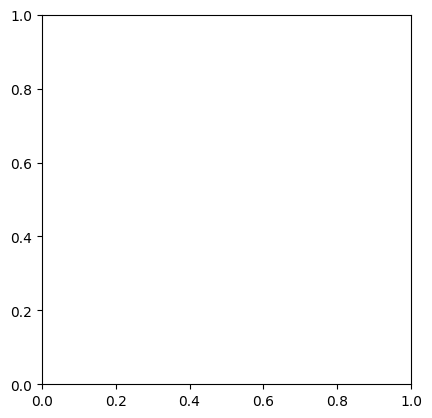

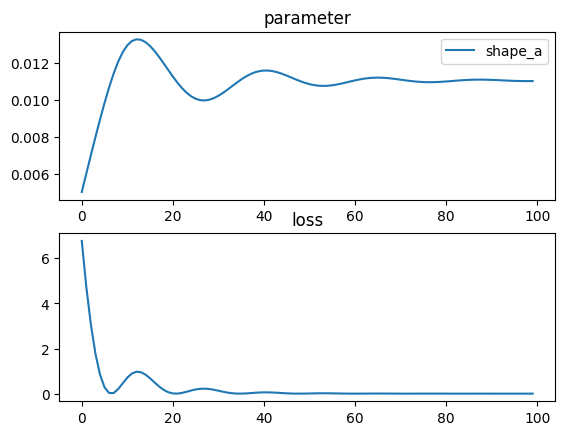

rays aperture 0.0
rays aperture 0.0
rays aperture 0.5011797
rays aperture 0.49643707


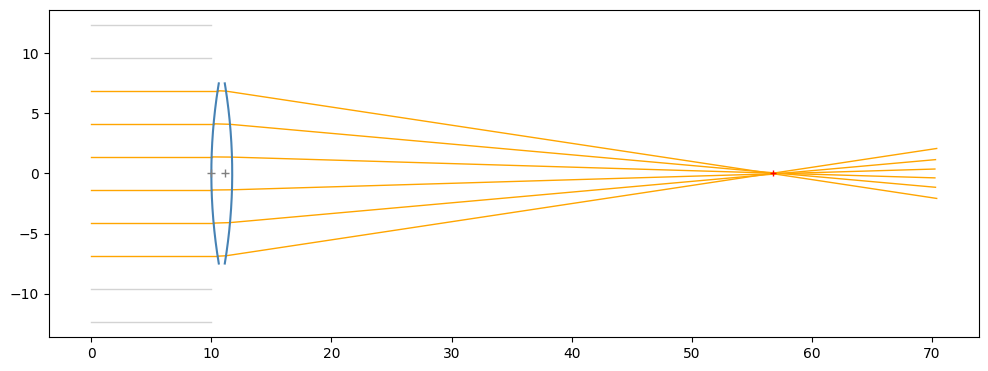

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm


class Optics(tlm.Module):
    def __init__(self):
        super().__init__()
        self.shape = tlm.Parabola(height=15., a=nn.Parameter(torch.tensor(0.005)))

        self.lens = tlm.SymmetricLens(self.shape, (1.0, 1.49), outer_thickness=0.5)

        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=25),
            tlm.Gap(10.),
            
            self.lens,
            
            tlm.Gap(45.0),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-3),
    sampling = {"rays": 10},
    num_iter = 100
)

tlm.render_plt(optics)

In [2]:
from IPython.display import display
import build123d as bd

part = tlm.lens_to_part(optics.lens)
display(part)

print("Outer thickness:", optics.lens.outer_thickness().item())
print("Inner thickness:", optics.lens.inner_thickness().item())

# bd.export_step(part, "lens.step")

Part at 0x73fb612bdbe0, label(), #children(0)

Outer thickness: 0.5
Inner thickness: 1.73758864402771
